In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "gyroscope_labeled.csv"  # Update with actual path
df = pd.read_csv(file_path)

# Display column names and first few rows
print(df.head())


                                              x-gyro  \
0                                                 []   
1                                                 []   
2  [-0.5705, -0.5705, -0.5705, -0.5705, -0.5645, ...   
3  [2.5676, 2.5676, 1.9738, 1.9738, 1.8028, 1.802...   
4                                                 []   

                                              y-gyro  \
0                                                 []   
1                                                 []   
2  [0.9889, 0.9889, 0.9889, 0.9889, 0.9773, 0.977...   
3  [-1.0166, -1.0166, 0.078, 0.078, -0.9409, -0.9...   
4                                                 []   

                                              z-gyro  label  
0                                                 []      1  
1                                                 []      1  
2  [1.3743, 1.3743, 1.3743, 1.3743, 1.392, 1.392,...      1  
3  [-0.8944, -0.8944, -0.7271, -0.7271, -0.3898, ...      1  
4               

In [2]:
import pandas as pd
import numpy as np

# Load your dataset (update the path to your CSV file)
df = pd.read_csv("gyroscope_labeled.csv")

# Replace blank strings (or strings with only spaces) with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

# For numeric columns: fill NaN with the mean of the column
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# (Optional) For non-numeric columns, you might choose to fill NaN with the most frequent value (mode)
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Save the cleaned dataset to a new CSV file if desired
df.to_csv("your_dataset_cleaned.csv", index=False)

print("Data cleaning complete. Nulls and blanks in numeric columns are filled with the column mean.")



Data cleaning complete. Nulls and blanks in numeric columns are filled with the column mean.


In [3]:
df = pd.read_csv("your_dataset_cleaned.csv")
df

,x-gyro,y-gyro,z-gyro,label
0,[],[],[],1
1,[],[],[],1
2,"[-0.5705, -0.5705, -0.5705, -0.5705, -0.5645, ...","[0.9889, 0.9889, 0.9889, 0.9889, 0.9773, 0.977...","[1.3743, 1.3743, 1.3743, 1.3743, 1.392, 1.392,...",1
3,"[2.5676, 2.5676, 1.9738, 1.9738, 1.8028, 1.802...","[-1.0166, -1.0166, 0.078, 0.078, -0.9409, -0.9...","[-0.8944, -0.8944, -0.7271, -0.7271, -0.3898, ...",1
4,[],[],[],1
...,...,...,...,...
245,"[0.4013, 0.6298, 0.0715, -0.6561, -0.5675, -0....","[-1.3073, -1.3732, -1.4801, 0.7019, 2.7086, 2....","[0.3818, 0.3115, 0.0104, -0.4325, -0.711, -0.6...",3
246,"[-0.4649, -0.2658, -0.2658, -0.0398, -0.0398, ...","[0.8274, 0.3484, 0.3484, -0.0559, -0.0559, -0....","[-0.4849, -0.4544, -0.4544, -0.3689, -0.3689, ...",3
247,"[1.0995, 1.0995, 1.0995, 1.0995, 0.1605, 0.160...","[-0.6255, -0.6255, -0.6255, -0.6255, -0.2639, ...","[0.5538, 0.5538, 0.5538, 0.5538, -0.0723, -0.0...",3
248,[],[],[],3


In [4]:
import pandas as pd
import numpy as np
import ast
import re

# Load the gyroscope dataset (update the path as needed)
df = pd.read_csv("gyroscope_labeled.csv")

# List of gyroscope columns to update
gyro_columns = ["x-gyro", "y-gyro", "z-gyro"]

def compute_list_mean(cell):
    """
    Convert a string representation of a list to an actual list,
    then convert each element to float and compute the mean.
    If the cell represents an empty list or conversion fails, return np.nan.
    """
    # If the cell is missing, return NaN
    if pd.isnull(cell):
        return np.nan
    
    # If the cell is a string, remove whitespace and check if it equals "[]"
    if isinstance(cell, str):
        if re.sub(r"\s+", "", cell) == "[]":
            return np.nan

    try:
        # Convert the cell (if string) to an actual list
        lst = ast.literal_eval(cell)
    except Exception:
        return np.nan

    # If the list is empty, return NaN
    if not lst:
        return np.nan

    try:
        # Convert each element in the list to a float
        float_lst = [float(x) for x in lst]
    except Exception:
        return np.nan

    return np.mean(float_lst)

# Process each gyroscope column and update the original column
for col in gyro_columns:
    # Compute the mean for each row in the column
    computed_means = df[col].apply(compute_list_mean)
    
    # Compute the overall mean from the computed values (ignoring NaNs)
    overall_mean = computed_means.mean()
    
    # Replace any NaN (from empty lists or conversion errors) with the overall mean
    computed_means.fillna(overall_mean, inplace=True)
    
    # Update the original column with the computed means
    df[col] = computed_means

# Save the updated dataset to a new CSV file
output_path = "gyroscope_data_cleaned.csv"
df.to_csv(output_path, index=False)

print("Gyroscope dataset cleaned successfully. Blank list values have been replaced with the computed mean values.")


Gyroscope dataset cleaned successfully. Blank list values have been replaced with the computed mean values.


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("gyroscope_data_cleaned.csv")
df


,x-gyro,y-gyro,z-gyro,label
0,-0.001922,-0.002145,0.017354,1
1,-0.001922,-0.002145,0.017354,1
2,0.000945,0.028838,0.014668,1
3,0.000921,0.013366,-0.028399,1
4,-0.001922,-0.002145,0.017354,1
...,...,...,...,...
245,0.003324,0.016959,-0.012814,3
246,-0.002224,-0.050562,-0.004653,3
247,0.014010,0.038896,0.007515,3
248,-0.001922,-0.002145,0.017354,3


In [31]:
print(df.shape)
df.info()

(250, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x-gyro  250 non-null    float64
 1   y-gyro  250 non-null    float64
 2   z-gyro  250 non-null    float64
 3   label   250 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 7.9 KB


In [32]:
df.describe()

,x-gyro,y-gyro,z-gyro,label
count,250.000000,250.000000,250.000000,250.000000
mean,-0.001922,-0.002145,0.017354,2.156000
std,0.010835,0.021593,0.019090,0.875632
min,-0.078681,-0.094355,-0.055556,1.000000
25%,-0.001922,-0.002145,0.015659,1.000000
50%,-0.001922,-0.002145,0.017354,2.000000
75%,-0.001922,-0.002145,0.017354,3.000000
max,0.039098,0.087653,0.137089,3.000000


In [33]:
X = df[['x-gyro', 'y-gyro','z-gyro']].values

In [34]:
y =df[["label"]].values

In [35]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
svc = SVC()
svc.fit(X_train, y_train)
y2_pred = svc.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y2_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        15
           3       0.37      0.95      0.53        19

    accuracy                           0.36        50
   macro avg       0.12      0.32      0.18        50
weighted avg       0.14      0.36      0.20        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarni

In [37]:
accuracy_score(y2_pred,y_test, normalize=True)

0.36

<Axes: >

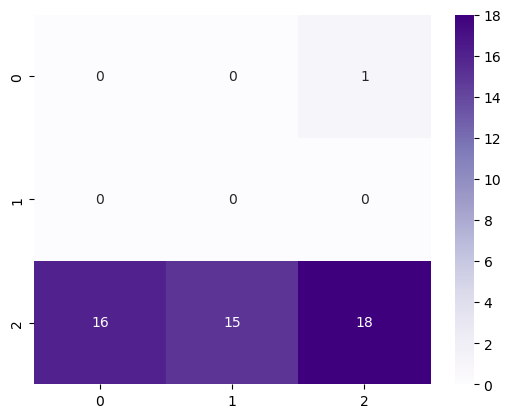

In [38]:
import seaborn as sns
con=sm.confusion_matrix(y2_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y3_pred = dtc.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y3_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.08      0.06      0.07        16
           2       0.50      0.07      0.12        15
           3       0.39      0.74      0.51        19

    accuracy                           0.32        50
   macro avg       0.32      0.29      0.23        50
weighted avg       0.32      0.32      0.25        50



In [40]:
accuracy_score(y3_pred,y_test, normalize=True)

0.32

<Axes: >

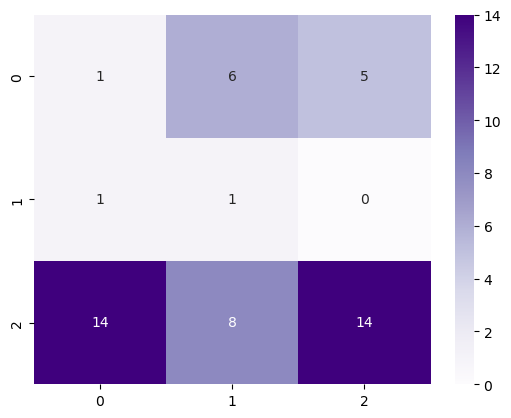

In [41]:
con=sm.confusion_matrix(y3_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [42]:
import time
start_rfc = time.time()
rfc = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)
end_rfc = time.time()
final_rfc = end_rfc - start_rfc
final_rfc = round(final_rfc,3)
y4_pred = rfc.predict(X_test)

C:\Users\91977\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [43]:
print("Computation time                    : {}Sec".format(final_rfc))
print("Classification Report:\n",classification_report(y_test, y4_pred))

Computation time                    : 0.487Sec
Classification Report:
               precision    recall  f1-score   support

           1       0.12      0.06      0.08        16
           2       1.00      0.07      0.12        15
           3       0.41      0.89      0.57        19

    accuracy                           0.38        50
   macro avg       0.51      0.34      0.26        50
weighted avg       0.50      0.38      0.28        50



In [44]:
accuracy_score(y4_pred,y_test, normalize=True)

0.38

<Axes: >

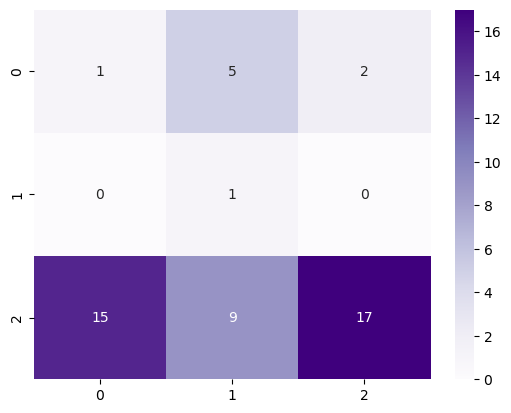

In [45]:
con=sm.confusion_matrix(y4_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [46]:
nbmod=GaussianNB()
nbmod.fit(X_train,y_train)
y5_pred = nbmod.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y5_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.88      0.57        16
           2       0.60      0.20      0.30        15
           3       0.50      0.32      0.39        19

    accuracy                           0.46        50
   macro avg       0.51      0.46      0.42        50
weighted avg       0.51      0.46      0.42        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
accuracy_score(y5_pred,y_test, normalize=True)

0.46

<Axes: >

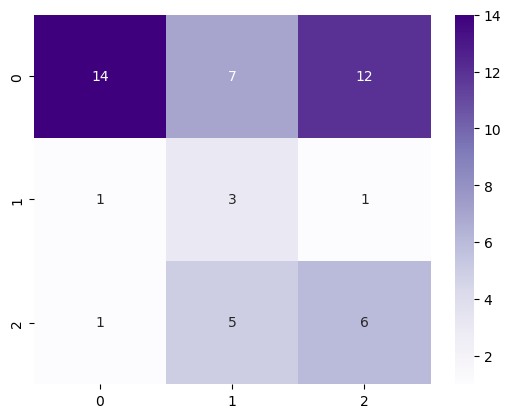

In [48]:
con=sm.confusion_matrix(y5_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y6_pred = knn.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y6_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.81      0.49        16
           2       1.00      0.07      0.12        15
           3       0.50      0.32      0.39        19

    accuracy                           0.40        50
   macro avg       0.62      0.40      0.33        50
weighted avg       0.60      0.40      0.34        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [50]:

accuracy_score(y6_pred,y_test, normalize=True)

0.4

<Axes: >

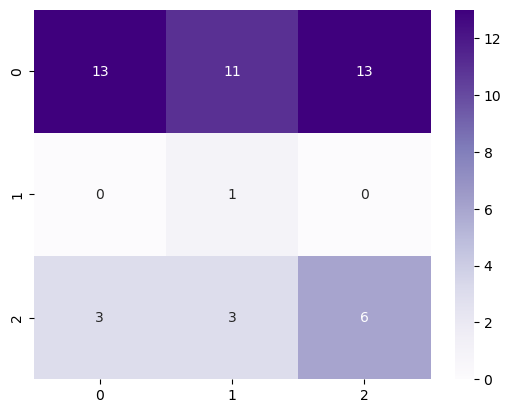

In [51]:
con=sm.confusion_matrix(y6_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')


TensorFlow version: 2.17.0
Dataset shape: (250, 4)

Label distribution:
label
3    118
1     79
2     53
Name: count, dtype: int64

Sample data:
     x-gyro    y-gyro    z-gyro  label
0 -0.001922 -0.002145  0.017354      1
1 -0.001922 -0.002145  0.017354      1
2  0.000945  0.028838  0.014668      1
3  0.000921  0.013366 -0.028399      1
4 -0.001922 -0.002145  0.017354      1
Training sequences shape: (190, 10, 3)
Testing sequences shape: (40, 10, 3)


C:\Users\91977\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,611 (205.51 KB)

 Trainable params: 52,611 (205.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.4148 - loss: 1.0941 - val_accuracy: 0.5250 - val_loss: 1.0816
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4675 - loss: 1.0742 - val_accuracy: 0.5250 - val_loss: 1.0584
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4629 - loss: 1.0531 - val_accuracy: 0.5250 - val_loss: 1.0287
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4742 - loss: 1.0337 - val_accuracy: 0.5250 - val_loss: 1.0122
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4763 - loss: 1.0225 - val_accuracy: 0.5250 - val_loss: 1.0202
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4614 - loss: 1.0270 - val_accuracy: 0.5250 - val_loss: 1.0203
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4921 - loss: 1.0125 - val_accuracy: 0.5250 - val_loss: 1.0260
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4631 - loss: 1.0063 - val_accuracy: 0.5000 - val_loss: 1.0279

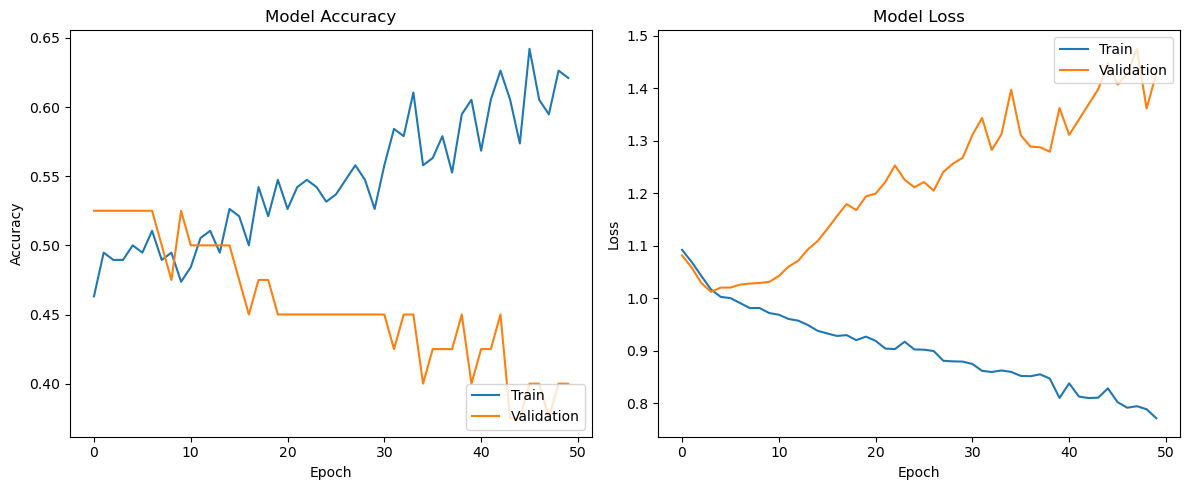

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.19      0.38      0.25         8
           3       0.57      0.62      0.59        21

    accuracy                           0.40        40
   macro avg       0.25      0.33      0.28        40
weighted avg       0.33      0.40      0.36        40



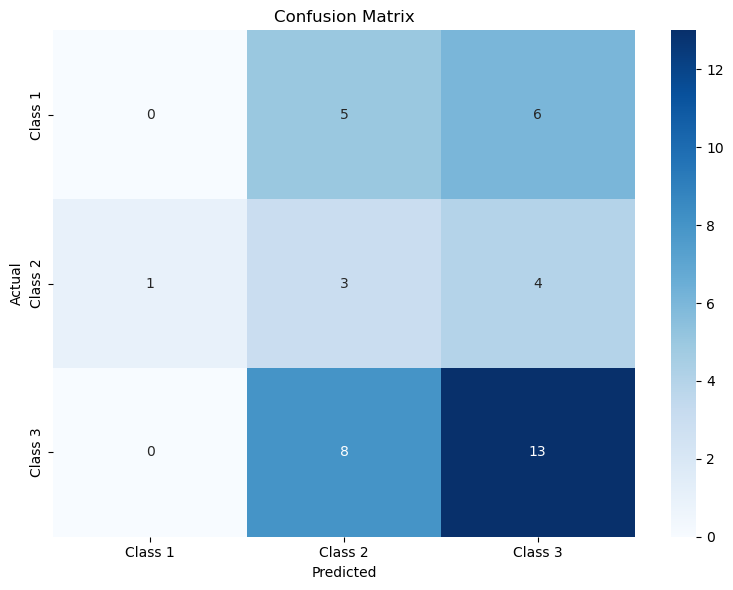

Model training and evaluation complete!


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Try importing tensorflow and keras
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.utils import to_categorical
    print("TensorFlow version:", tf.__version__)
except ImportError:
    print("TensorFlow is not installed. Please install it using:")
    print("pip install tensorflow")
    # If TensorFlow isn't installed, provide installation instructions
    raise

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess the data
data = pd.read_csv('gyroscope_data_cleaned.csv')

# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nLabel distribution:")
print(data['label'].value_counts())
print("\nSample data:")
print(data.head())

# Separate features and target
X = data[['x-gyro', 'y-gyro', 'z-gyro']].values
y = data['label'].values - 1  # Adjust labels to start from 0 (for Keras)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create sequence data for LSTM
def create_sequences(X, y, sequence_length=10):
    Xs, ys = [], []
    for i in range(len(X) - sequence_length):
        Xs.append(X[i:i+sequence_length])
        ys.append(y[i+sequence_length])
    return np.array(Xs), np.array(ys)

# Define sequence length
seq_length = 10

# Create sequences
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train_seq, num_classes=3)
y_test_cat = to_categorical(y_test_seq, num_classes=3)

print("Training sequences shape:", X_train_seq.shape)
print("Testing sequences shape:", X_test_seq.shape)

# Build LSTM model
def create_lstm_model(input_shape, num_classes=3):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and compile the model
model = create_lstm_model((seq_length, 3), num_classes=3)
model.summary()

# Train the model
history = model.fit(
    X_train_seq, y_train_cat,
    validation_data=(X_test_seq, y_test_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Evaluate the model
y_pred_prob = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert predictions and test labels back to original range (1-3)
y_pred_original = y_pred + 1
y_test_original = y_test_seq + 1

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# Plot confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Save the model
model.save('gyroscope_lstm_model.h5')

# Function to predict on new data
def predict_new_data(model, new_data, scaler, seq_length=10):
    # Scale new data using the same scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Create sequences
    sequences = []
    for i in range(len(new_data_scaled) - seq_length + 1):
        sequences.append(new_data_scaled[i:i+seq_length])
    
    # Convert to numpy array
    sequences = np.array(sequences)
    
    # Make predictions
    predictions_prob = model.predict(sequences)
    predictions = np.argmax(predictions_prob, axis=1)
    
    # Convert predictions back to original range (1-3)
    predictions = predictions + 1
    
    return predictions


print("Model training and evaluation complete!")